In [15]:
%load_ext autoreload
%autoreload 2

from src import loading, metrics, modeling, preprocessing, evaluation

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Loading data

In [2]:
df = loading.load_data()

## Preprocessing

In [3]:
df_preprocess = preprocessing.preprocess_data(df)

## Preparing data for ML models

In [4]:
X_train, X_val, y_train, y_val = preprocessing.split(df_preprocess)

## Training model

In [5]:
modeling.fit_model(X_train,y_train)

/opt/homebrew/Caskroom/miniforge/base/envs/ML/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(max_features='sqrt', n_estimators=1000,
                           subsample=0.5)

## Evaluating saved model

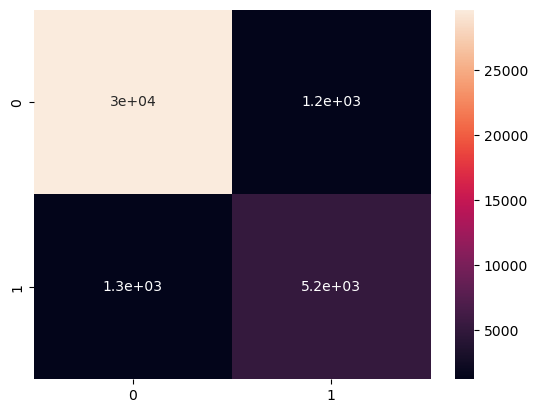

In [6]:
model = modeling.load_model()
evaluation.evaluate_model(model,X_val,y_val)

In [16]:
total_sale = (X_val['mean_sales'] * X_val['n_orders']).sum()
metrics.model_performance(model,X_val,y_val.values.squeeze()).sum()/total_sale

0.10806333374921662